In [1]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier # tree 분류 모델
from sklearn.metrics import accuracy_score

In [2]:
# 데이터 불러오기
data = pd.read_csv('./archive/example.csv')
data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26547,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26548,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26549,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26550,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [3]:
# 문제와 답 (열 분리)
X = data[['FG_PCT_home','FG_PCT_away']]
y = data['HOME_TEAM_WINS']

In [4]:
# 훈련셋과 테스트셋 분리 (행 분리)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 5) 

In [5]:
# 모델 객체 생성
tree_model = DecisionTreeClassifier(max_depth=5)

In [6]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [7]:
# 모델 예측
# y_pred = model.predict(X_test)

In [8]:
# 정확도 평가
# accuracy = accuracy_score(y_test, y_pred)
tree_acc = tree_model.score(X_test, y_test)
tree_acc

0.7802048809882495

In [9]:
# 교차 검증 수행
tree_result = cross_val_score(tree_model, X_train, y_train, cv=5)
tree_result

array([0.78759729, 0.80416771, 0.78157168, 0.78684409, 0.79708689])

In [10]:
# 결과 출력
print(f"교차 검증 점수: {tree_result}")
print(f"평균 교차 검증 점수: {tree_result.mean()}")
# print(f"테스트 세트 정확도: {accuracy}")
print(f"테스트 세트 정확도: {tree_acc}")


교차 검증 점수: [0.78759729 0.80416771 0.78157168 0.78684409 0.79708689]
평균 교차 검증 점수: 0.7914535318549338
테스트 세트 정확도: 0.7802048809882495


#### 최적의 하이퍼 파라미터 조합을 찾아보자!
 - GridSearchCV
 - 1. 모델에 연결할 파라미터의 조합을 정의
   2. 임의로 연결할 모델 생성
   3. 그리드서치 내부 파라미터 값들을 연결 - 그리드 객체 생성
   4. 그리드서치 객체에 데이터를 연결하여 실행

In [12]:
params = {'max_depth':range(3,10),
          # 'max_depth':[3,5,7,9],
          # 'min_samples_split':[50,60,70],
          # 'min_samples_leaf':[50,60],
          # 'max_leaf_nodes':[7,9]
         }
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [13]:
# n_jobs 계산할 수 있는 컴퓨터 내부 성능(코어) 개수 설정
# 조합되는 파라미터 경우의 수가 많을 수록 걔산량 많아짐 -> -1(전체, 모두)
# n_jobs = -1, 윈도우 디렉토리에 대해서 확인 작업(내부적으로) 사용자 이름 한국어면 에러

In [14]:
# 여러 조합을 모델에 연결하며 훈련을 진행 -> 최적의 파라미터 조합 알려줌
grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 10)}, scoring='accuracy',
             verbose=1)

In [15]:
# 가장 성능이 높은 파라미터 조합 확인
print(grid.best_params_)
print(grid.best_score_) 
# 실험할 수 있는 편한 도구일 뿐 -> 적절한 파라미터 경우의 수 입력
# 과대적합 키워드를 1개만 활용해도 충분한 데이터 였을 것 같음

{'max_depth': 6}
0.79602327975261


In [44]:
# 정확도 점수 확인
tree_model1 = DecisionTreeClassifier(max_depth=5)
tree_model1.fit(X_train,y_train)
print("예측 정확도: {0}".format(tree_model1.score(X_test,y_test)))

예측 정확도: 0.7802048809882495


In [17]:
# df_fi = pd.DataFrame(tree_model.feature_importances_).T
# # 숫자 값이 크면 클수록 중요도가 높은 것
# df_fi.columns = X_train.columns
# df_fi

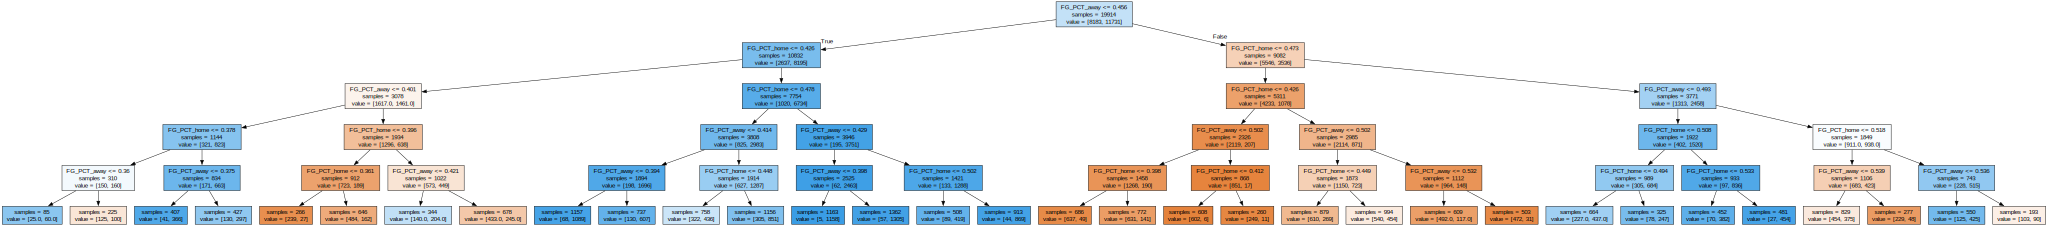

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               # class_names=iris_data.target_names,
               feature_names=X_train.columns,
               impurity=False,
               filled=True)

import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

#### 결정 트리 과적합 해소

In [20]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_10832\1586832238.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


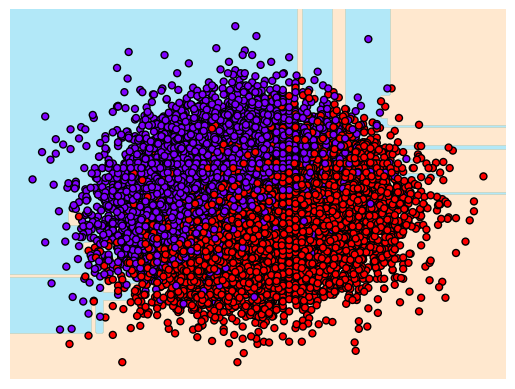

In [21]:
# 과적합
dt_clf = DecisionTreeClassifier(random_state=4).fit(X_train, y_train)
visualize_boundary(dt_clf, X_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_10832\1586832238.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


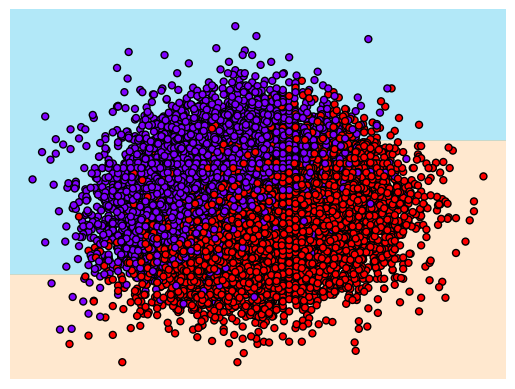

In [22]:
# 과적합 해소
dt_clf = DecisionTreeClassifier(random_state=4,max_depth=5).fit(X_train, y_train)
visualize_boundary(dt_clf, X_train, y_train)